In [407]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

%matplotlib inline

# Loading Dataset

In [408]:
df=pd.read_csv('Loanpredictionproblem1.csv')
#df.info()
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing the dataset

In [409]:
#find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [410]:
#Filling the missing values for numerical terms-mean
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [411]:
#Filling the missing values for categorical term-mode

df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [412]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

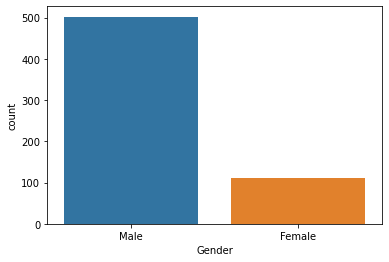

In [413]:
#Categorical attributes visualization
sns.countplot(df['Gender'])


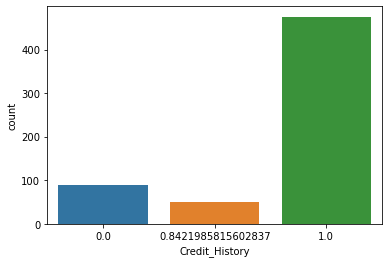

In [414]:
sns.countplot(df['Credit_History'])


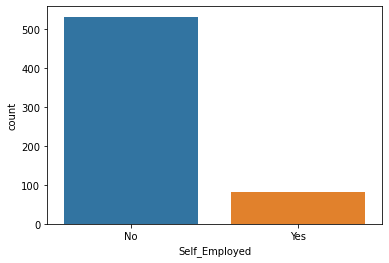

In [415]:
sns.countplot(df['Self_Employed'])



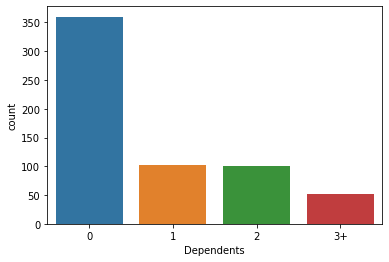

In [416]:
sns.countplot(df['Dependents'])

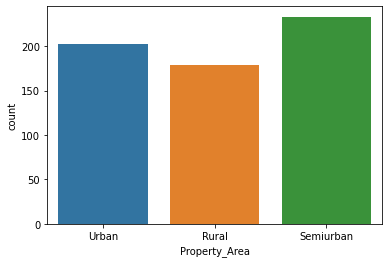

In [417]:
sns.countplot(df['Property_Area'])

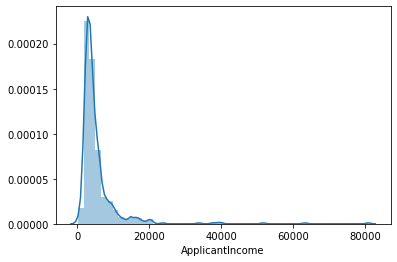

In [418]:
#Numerical attributes visualization
sns.distplot(df['ApplicantIncome'])

In [419]:
#apply transfrmation  to the attribute
df['ApplicantIncome_log']=np.log(df['ApplicantIncome'])

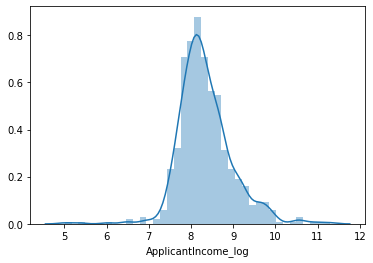

In [420]:
#sns.distplot(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncome_log'])

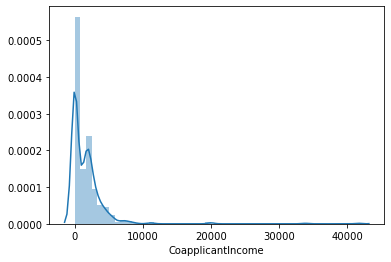

In [421]:

sns.distplot(df['CoapplicantIncome'])

In [422]:
df['CoapplicantIncome_log']=np.log(df['CoapplicantIncome'])

C:\Users\shrav1\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\shrav1\anaconda3\lib\site-packages\seaborn\distributions.py:35: RuntimeWarning: invalid value encountered in double_scalars
  return int(np.ceil((a.max() - a.min()) / h))


ValueError: cannot convert float NaN to integer

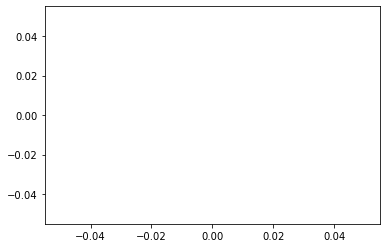

In [423]:
sns.distplot(df['CoapplicantIncome_log'])

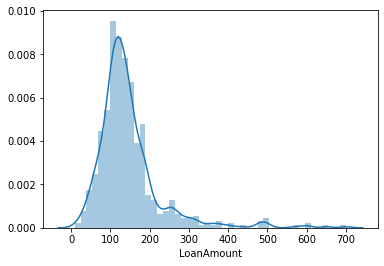

In [424]:
sns.distplot(df['LoanAmount'])

In [425]:
df['LoanAmount_log']=np.log(df['LoanAmount'])

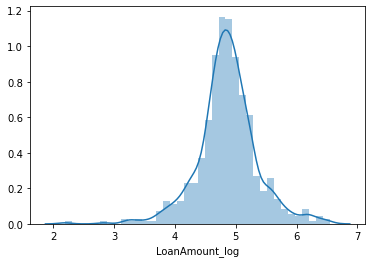

In [426]:
sns.distplot(df['LoanAmount_log'])

C:\Users\shrav1\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


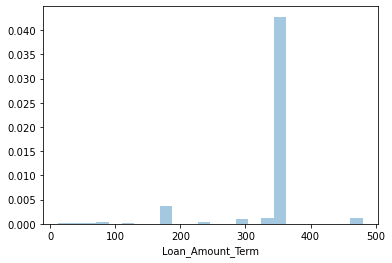

In [427]:
sns.distplot(df['Loan_Amount_Term'])

In [428]:
df['Loan_Amount_Term_log']=np.log(df['Loan_Amount_Term'])

C:\Users\shrav1\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


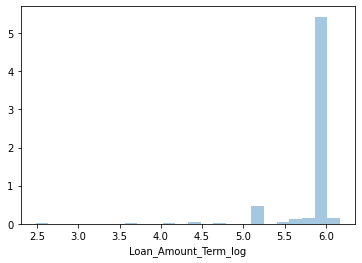

In [429]:
sns.distplot(df['Loan_Amount_Term_log'])

C:\Users\shrav1\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


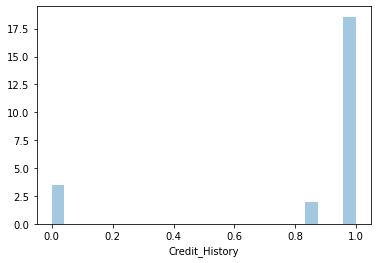

In [430]:
sns.distplot(df['Credit_History'])

# Creation of New Attribute   

In [431]:
df['total_income']=df['ApplicantIncome']+df['CoapplicantIncome']

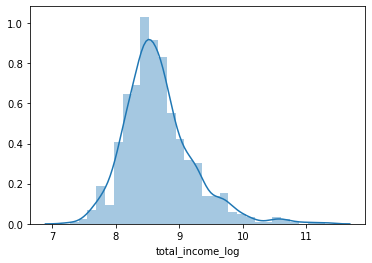

In [432]:
# totalincome
df['total_income_log']=np.log(df['total_income'])
sns.distplot(df['total_income_log'])

# Correlation Matrix

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,total_income,total_income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026,-inf,4.986426,5.886104,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.430109,7.318540,4.852030,5.886104,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006368,-inf,4.189655,5.886104,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,7.856707,7.765569,4.787492,5.886104,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699515,-inf,4.948760,5.886104,6000.0,8.699515


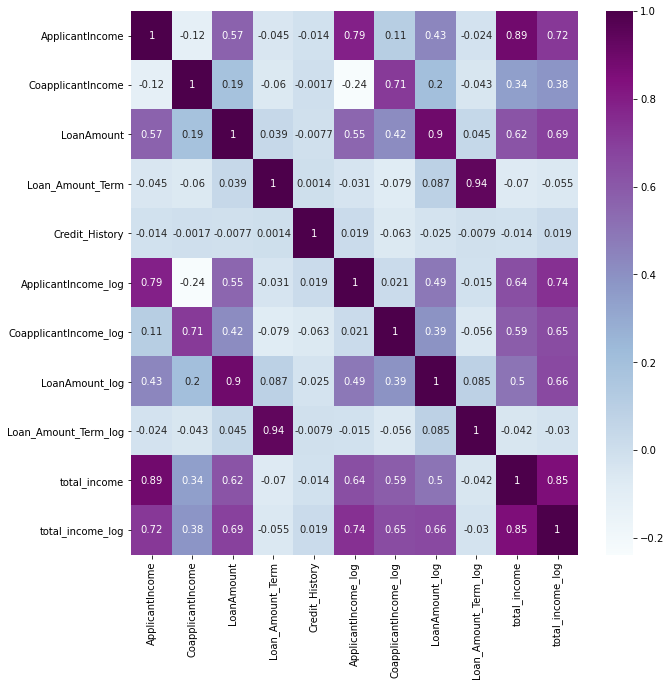

In [433]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='BuPu')
df.head()

In [434]:
#Drop Unneccsarry Columns
cols=['total_income','Credit_History','Loan_Amount_Term','ApplicantIncome','Loan_ID','CoapplicantIncome_log','CoapplicantIncome']
df=df.drop(columns=cols,axis=1)

In [435]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,total_income_log
0,Male,No,0,Graduate,No,146.412162,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,128.000000,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,66.000000,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,120.000000,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,141.000000,Urban,Y,8.699515,4.948760,5.886104,8.699515


# Label Encoding

In [436]:
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])

In [437]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,total_income_log
0,1,0,0,0,0,146.412162,2,Y,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,128.000000,0,N,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,66.000000,2,Y,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,120.000000,2,Y,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,141.000000,2,Y,8.699515,4.948760,5.886104,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.000000,0,Y,7.972466,4.262680,5.886104,7.972466
610,1,1,3,0,0,40.000000,0,Y,8.320205,3.688879,5.192957,8.320205
611,1,1,1,0,0,253.000000,2,Y,8.996157,5.533389,5.886104,9.025456
612,1,1,2,0,0,187.000000,2,Y,8.933664,5.231109,5.886104,8.933664


In [438]:
#Train test split
X=df.drop('Loan_Status',axis=1)
Y=df['Loan_Status']

In [439]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

# Model Training

In [440]:
#Classify Function
from sklearn.model_selection import cross_val_score
def classify (model,X,Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
    model.fit(X_train,Y_train)
    print('Accuracy is ',model.score(X_test,Y_test)*100)
    #Cross valodation is used for better validation of the model
    #eg:cv-5,train-4,test-1
    score=cross_val_score(model,X,Y,cv=5)
    print('Cross validation is ',np.mean(score)*100)
    

In [441]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model,X,Y)

C:\Users\shrav1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is  71.35135135135135


C:\Users\shrav1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shrav1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Cross validation is  67.74890043982407


C:\Users\shrav1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [442]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model,X,Y)

Accuracy is  56.21621621621622
Cross validation is  60.098627215780354


In [443]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model=RandomForestClassifier()
classify(model,X,Y)

Accuracy is  68.64864864864865
Cross validation is  63.51859256297481


In [444]:
model=ExtraTreesClassifier()
classify(model,X,Y)

Accuracy is  70.8108108108108
Cross validation is  62.54298280687725


# Hyperparameter tuning

In [447]:
model=ExtraTreesClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)

classify(model,X,Y)

Accuracy is  72.43243243243244
Cross validation is  68.72984139677463


In [448]:
model=ExtraTreesClassifier()
model.fit(X_train,Y_train)


ExtraTreesClassifier()

In [449]:
from sklearn.metrics import confusion_matrix
Y_pred=model.predict(X_test)
cm= confusion_matrix(Y_test,Y_pred)
cm


array([[10, 33],
       [16, 95]], dtype=int64)

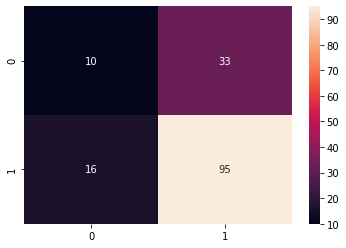

In [450]:
sns.heatmap(cm,annot=True)